In [4]:
!pip install "diffusers[torch]" transformers

In [9]:
from diffusers import DDPMPipeline

In [13]:
ddpm = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256", use_safetensors=False).to("cuda")

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

In [37]:
image = ddpm(num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

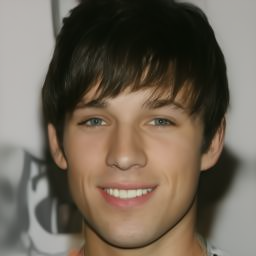

In [38]:
image

In [41]:
from diffusers import DDPMScheduler, UNet2DModel

In [43]:
scheduler = DDPMScheduler.from_pretrained("google/ddpm-celebahq-256", use_safetensors=False)

In [47]:
model = UNet2DModel.from_pretrained("google/ddpm-celebahq-256", use_safetensors=False).to("cuda")

In [48]:
scheduler.set_timesteps(50)

In [49]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [51]:
import torch

In [57]:
sample_size = model.config.sample_size
sample_size

256

In [58]:
image.size

(256, 256)

In [103]:
noise = torch.randn((1,3,sample_size,sample_size),device='cuda')

In [116]:
input = noise
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input,t).sample
    previous_noisy_sample = scheduler.step(noisy_residual,t,input).prev_sample
    input = previous_noisy_sample

In [117]:
input.shape

torch.Size([1, 3, 256, 256])

In [118]:
from PIL import Image
import numpy as np

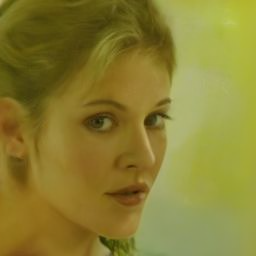

In [119]:
image = (input/2 + 0.5).clamp(0,1).squeeze()
image = (image.permute(1,2,0)*255).round().to(torch.uint8).cpu().numpy()
image = Image.fromarray(image)
image